### Import Libraries

In [701]:
#Libraries for data analysis
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Libraries for machine learning
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Data Loading

In [702]:
#Load the data in the housing_data variable
housing_data = pd.read_csv('data/kc_house_data.csv')
housing_data.head() #view the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [703]:
#view the last 5 rows
housing_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [704]:
#view the shape of the dataframe
housing_data.shape

(21597, 21)

* The dataframe has 21597 rows and 21 columns

In [705]:
#to view the columns
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [706]:
#to inspect the dataframe details/info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* The data types available include float, int and object
* The columns with null values include waterfront, view and yr_renovated

### Data Cleaning

In [707]:
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* waterfront has 2376 null values, view has 63 and yr_renovated has 3842 null values

### Data Preparation

##### For our modeling analysis, we shall use the following columns 
* price
* floors
* bathrooms
* bedrooms
* sqft_living
* condition



In [708]:
# create a new data set with the relevant columns to proceed with
housing_data_selected = housing_data.drop(['date','id',
       'sqft_lot', 'waterfront', 'view','grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
housing_data_selected.head()  


,price,bedrooms,bathrooms,sqft_living,floors,condition
0,221900.0,3,1.00,1180,1.0,3
1,538000.0,3,2.25,2570,2.0,3
2,180000.0,2,1.00,770,1.0,3
3,604000.0,4,3.00,1960,1.0,5
4,510000.0,3,2.00,1680,1.0,3


### Data Cleaning On Selected Columns

In [709]:
#view the selected columns null values
housing_data_selected.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
dtype: int64

#### Visualization For The Selected Variables Against Price

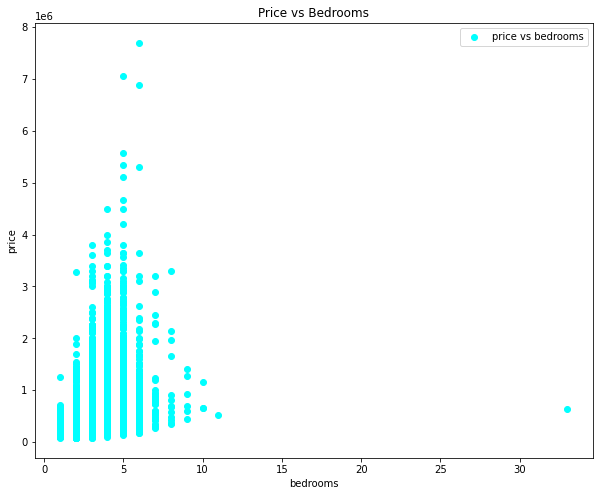

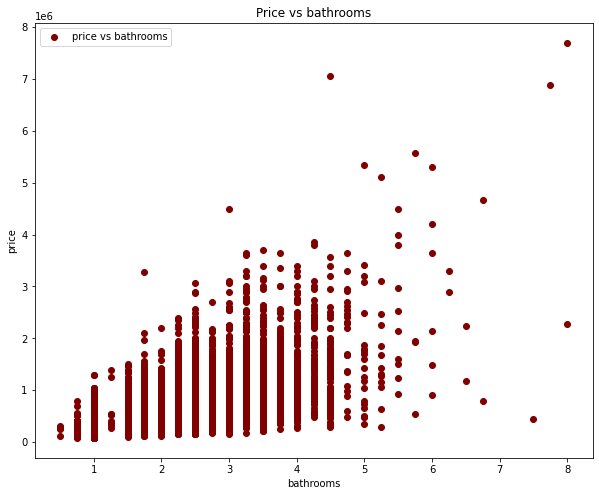

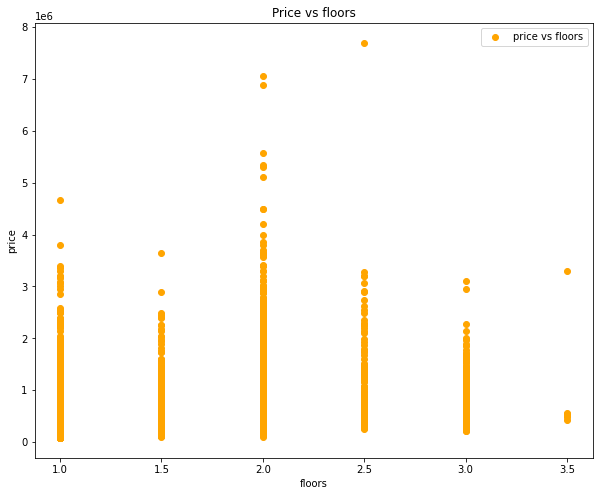

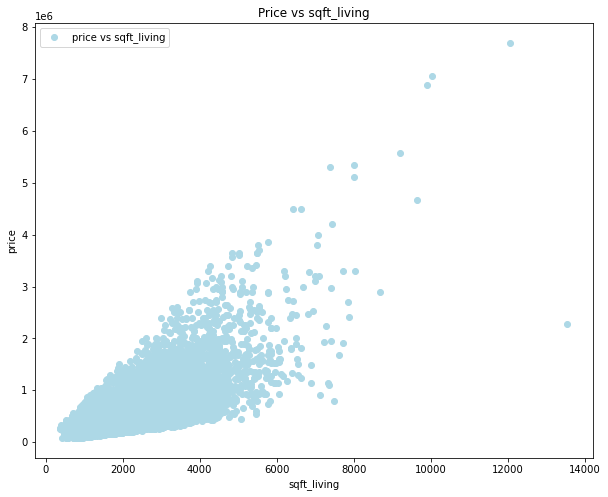

In [710]:
# Create scatter plots showing the corr between the price and bedrooms, bathrooms, sqft_living, floors
plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='bedrooms', y='price', color='cyan')

plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Price vs Bedrooms')
plt.legend(['price vs bedrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='bathrooms', y='price', color='maroon')

plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Price vs bathrooms')
plt.legend(['price vs bathrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='floors', y='price', color='orange')

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price vs floors')
plt.legend(['price vs floors'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='sqft_living', y='price', color='lightblue')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price vs sqft_living')
plt.legend(['price vs sqft_living'])
plt.show();

* From the visualization above we note that sqft_living has a positive correlation with price.

In [711]:
#To view the statistical details 
housing_data_selected.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,3.409825
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.650546
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000


#### Visualization To View the Outliers

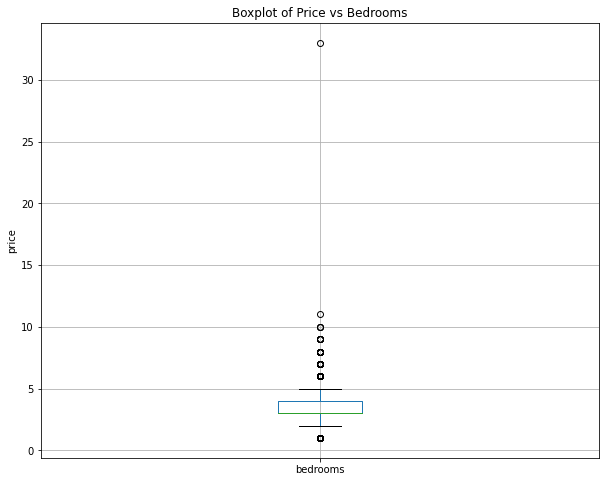

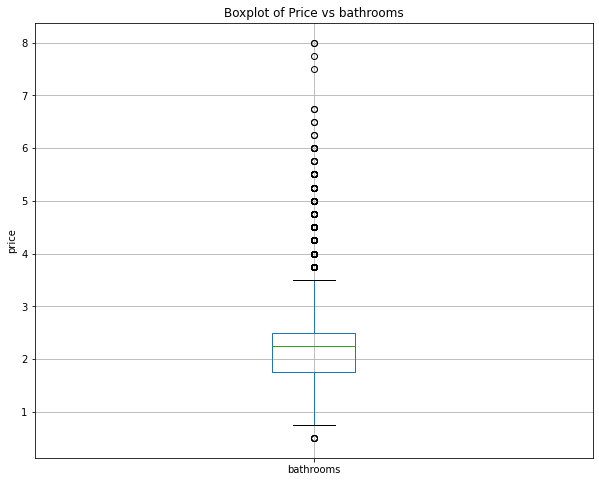

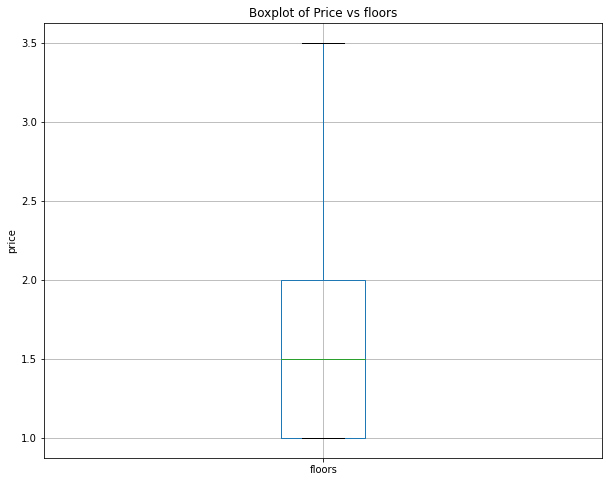

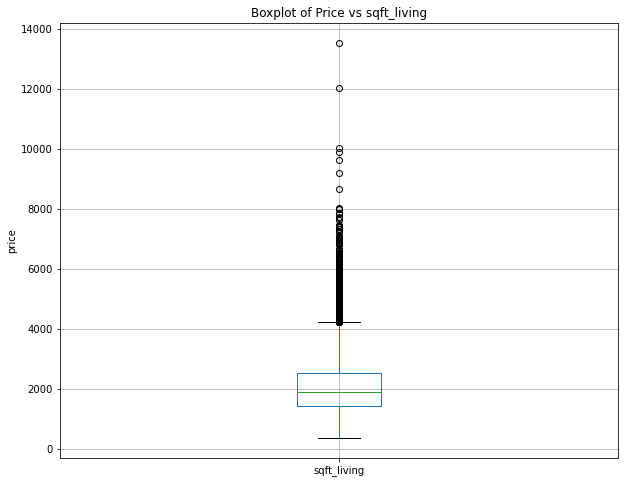

In [712]:
# Create a boxplot for all columns
plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='bedrooms')
plt.title('Boxplot of Price vs Bedrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='bathrooms')
plt.title('Boxplot of Price vs bathrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='floors')
plt.title('Boxplot of Price vs floors')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='sqft_living')
plt.title('Boxplot of Price vs sqft_living')
plt.ylabel('price')
plt.show()


#### Dealing With the Outlier on the Bedroom column

In [713]:
# Fixing incorrect bedroom data with the mode of the column as the 33 as the maximum value might be a result of wrongly typing
housing_data_selected.loc[(housing_data_selected.bedrooms == 33), 'bedrooms'] = housing_data_selected['bedrooms'].mode()

* The mode for the column is 3. 

In [714]:
#To now confirm the statistical details of the new dataframe
housing_data_selected.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition
count,2.159700e+04,21596.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371828,2.115826,2080.321850,1.494096,3.409825
std,3.673681e+05,0.904114,0.768984,918.106125,0.539683,0.650546
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.500000,5.000000


* The maximum number of rooms have reduced from 33 now to 11. 

#### A pairplot to view the distribution of the selected columns

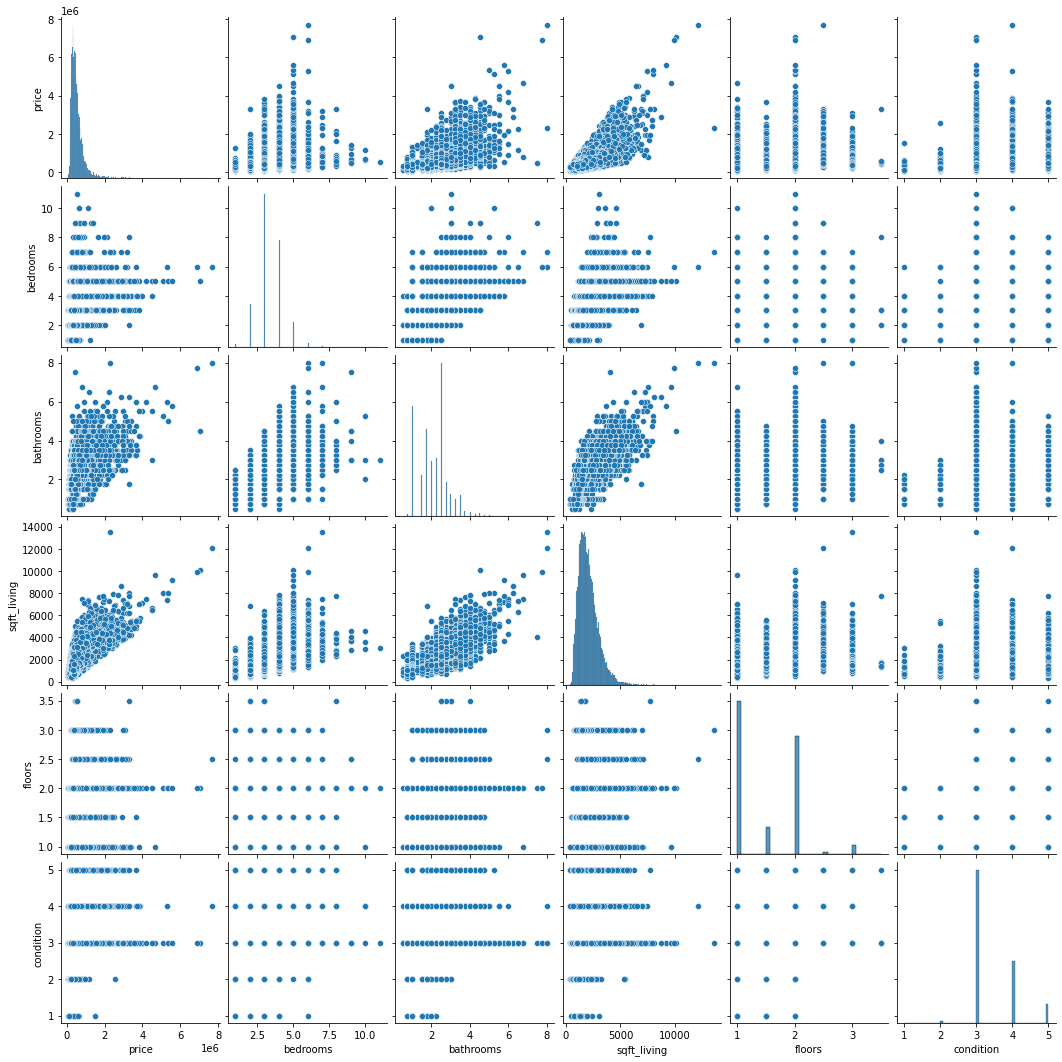

In [715]:
sns.pairplot(data=housing_data_selected);

* From the above pairplot we note that the column price and sqft_living have a normal distribution.

#### Correlation HeatMap


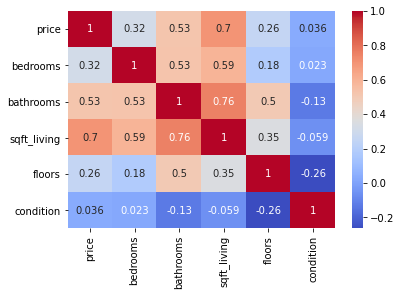

In [716]:
#to view the correlation matrix
sns.heatmap(housing_data_selected.corr(),cmap="coolwarm",annot=True);

In [717]:
#To check the correlation of the selected columns with the target column price
# Create a figure and axes
housing_data_selected.corr()['price'].sort_values(ascending=False)


price          1.000000
sqft_living    0.701917
bathrooms      0.525906
bedrooms       0.315961
floors         0.256804
condition      0.036056
Name: price, dtype: float64

##### From the output above, the following can be observed:

* 'price' has a perfect correlation of 1.000000 since any variable has a perfect correlation with itself.
* 'sqft_living' has the highest positive correlation with 'price' at approximately 0.7019. This indicates that there is a strong positive linear relationship between the square footage of living space ('sqft_living') and the price of houses. As the square footage of living space increases, the price tends to increase.
* bathrooms' has a positive correlation of approximately 0.5259 with 'price,' suggesting that as the number of bathrooms in a house increases, the price tends to increase, although the relationship is not as strong as with 'sqft_living.'
* bedrooms' has a positive correlation of approximately 0.3159 with 'price,' indicating that as the number of bedrooms increases, the price tends to increase, but again, this relationship is weaker than with 'sqft_living' and 'bathrooms.'
* floors' has a positive correlation of approximately 0.2568 with 'price,' suggesting that as the number of floors in a house increases, the price tends to increase, but this relationship is also weaker compared to 'sqft_living' and 'bathrooms.'

#### Feature Scaling the column sqft_living

In [718]:
scaler = StandardScaler()
housing_data_selected[['sqft_living']] = scaler.fit_transform(housing_data_selected[['sqft_living']])

##### Linear Regression of how square foot of the living area affects the price

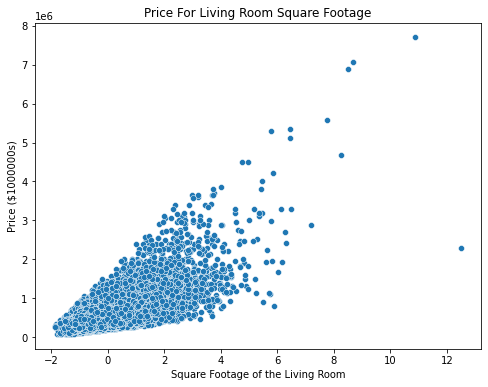

In [719]:
#Visualize the impact of sqft_living on the price of the house
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing_data_selected)
plt.title('Price For Living Room Square Footage')
plt.xlabel('Square Footage of the Living Room')
plt.ylabel('Price ($1000000s)')
plt.show();

* The above visualization shows the actual data estimates of the living area square footage
* We note from the above that the price of the house increases as the living room square footage increases. 

In [720]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]
# Extracting value for X variable for our baseline model
X_baseline = housing_data_selected[["sqft_living"]]

In [721]:
# Fit the OLS model with the baseline variables
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the model results
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:27   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1780.543    303.445      

##### Interpratation of the Results Above
* R-squared (R²): The R-squared value is 0.493, indicating that approximately 49.3% of the variance in 'price' can be explained by the linear relationship with 'sqft_living'.

* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05 alpha.

#### Actual Versus Predicted Value Visualization

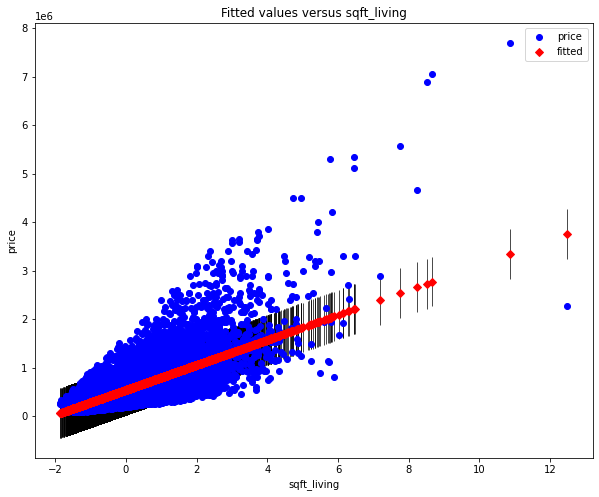

In [722]:
# Create a figure and axes to show the actual versus predicted values
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the fit using the baseline_results
sm.graphics.plot_fit(baseline_results, "sqft_living", ax=ax)

# Display the plot
plt.show()

#### Regression Diagnostic Plot For the Linear Model

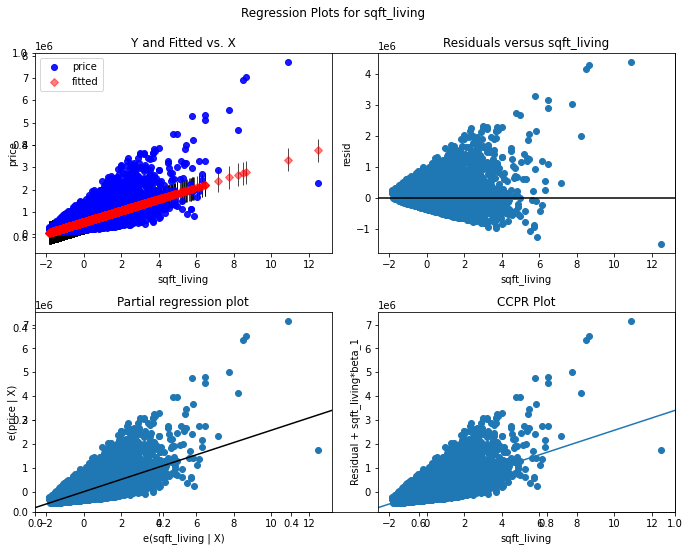

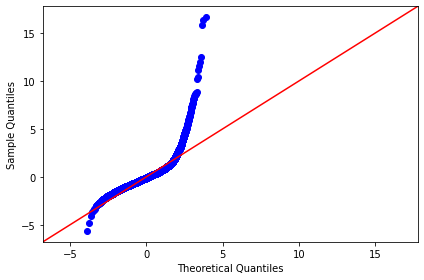

In [723]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

fig = sm.graphics.plot_regress_exog(baseline_results, 'sqft_living', fig=fig) 
fig = sm.graphics.qqplot(baseline_results.resid, dist=stats.norm,line='45', fit=True)  #To check the normality of the residuals
fig.tight_layout()
plt.show();

* Plot 1: The dependent variable vs. sqft_living with the regression line.
* Plot 2: Residuals vs. sqft_living to check for homoscedasticity (constant variance of residuals).
* Plot 3: Partial regression plot to show the relationship between price and sqft_living while accounting for other variables.
* Plot 4: The leverage plot to detect influential data points.
* Plot 5: The Q-Q plot to check the normality of residuals.

##### Data Preparation For the Linear Model

In [724]:
#Assign the X and y variables
X = housing_data_selected[['sqft_living']]
y = housing_data_selected['price']

##### Train Test Split

In [725]:
#train_test_split using 0.8 as the train and 0.2 as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

##### Modeling

In [726]:
#Training our linear model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [727]:
#run the y_predict
y_pred = model.predict(X_test)

##### Model Validation

In [728]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))


170982.92465955476
65977373783.61759
0.49332469237979504


#### Multiple Linear Regression

In [729]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]
# Extracting value for X variable for our baseline model
x_baseline = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]
#include all the independent variables selected

In [730]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]

# Extracting value for X variable for our baseline model
x_baseline = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]

# Print the columns with missing values if any
print("Columns with missing values:\n", x_baseline.columns[x_baseline.isnull().any()])

# Drop rows with missing values if any
x = x_baseline.dropna(inplace=True)
y = y[x_baseline.index]  # Update y to match the rows of x_baseline after dropping NaNs

# Fit the OLS model with the baseline variables
baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the model results
print(baseline_results.summary())

Columns with missing values:
 Index(['bedrooms'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4620.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:35   Log-Likelihood:            -2.9952e+05
No. Observations:               21596   AIC:                         5.991e+05
Df Residuals:                   21590   BIC:                         5.991e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

<ipython-input-730-37648dc8c0fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x = x_baseline.dropna(inplace=True)


##### Interpratation of the Results Above
* R-squared (R²): The R-squared value is 0.517, indicating that approximately 51.7% of the variance in 'price' can be explained by the multiple relationship with 'sqft_living', 'floors', 'bathrooms','bedrooms' and 'condition'.

* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05 alpha.

##### Regression Diagnostic For The Multiple Regression

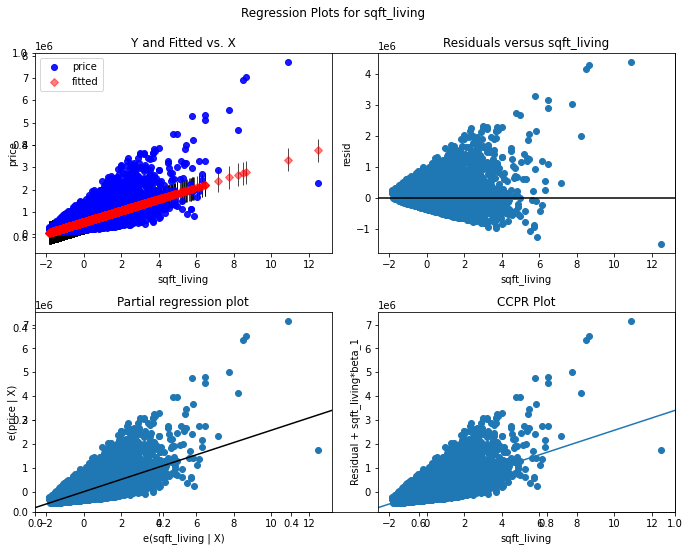

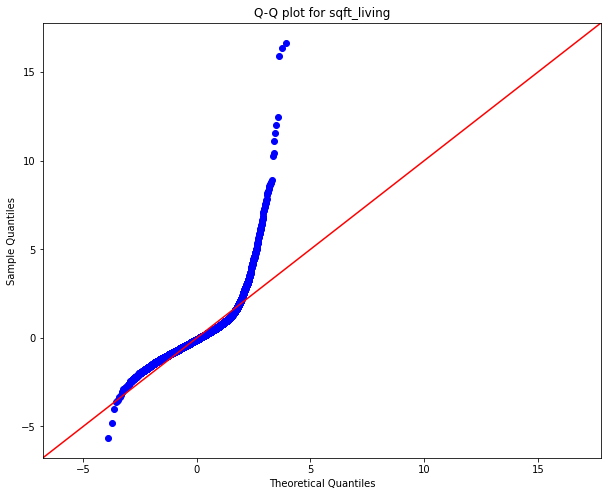

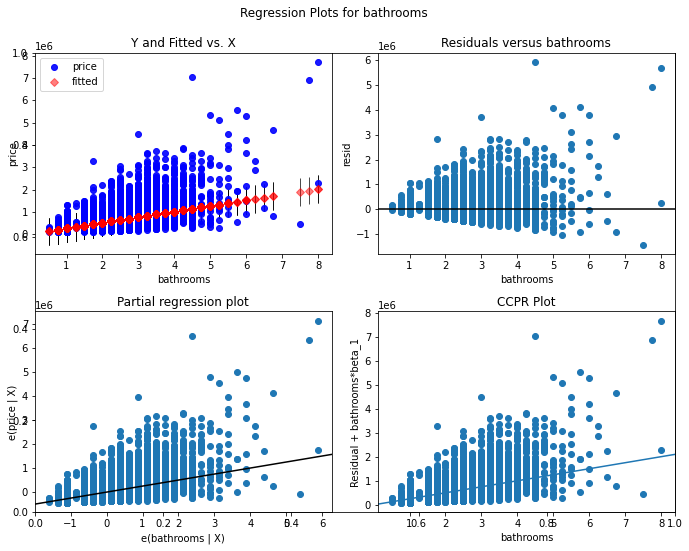

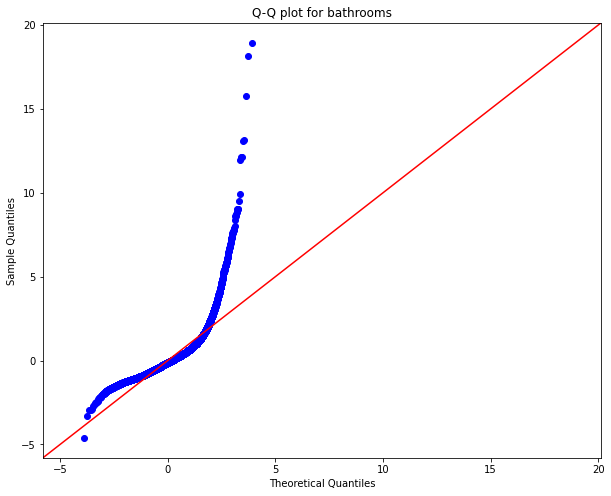

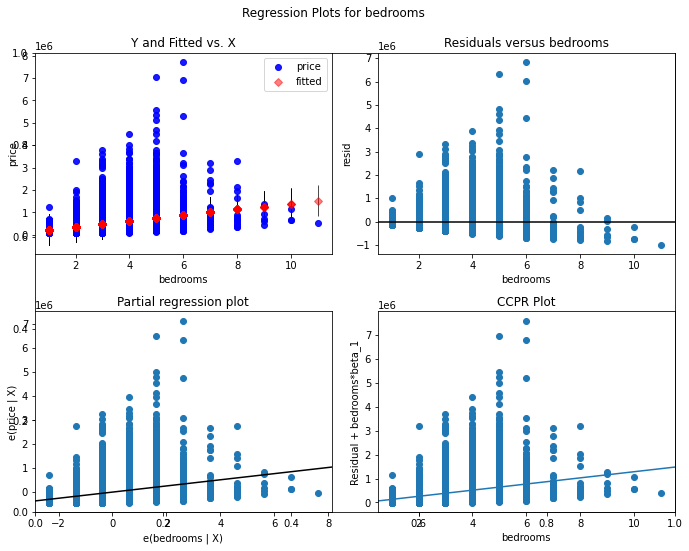

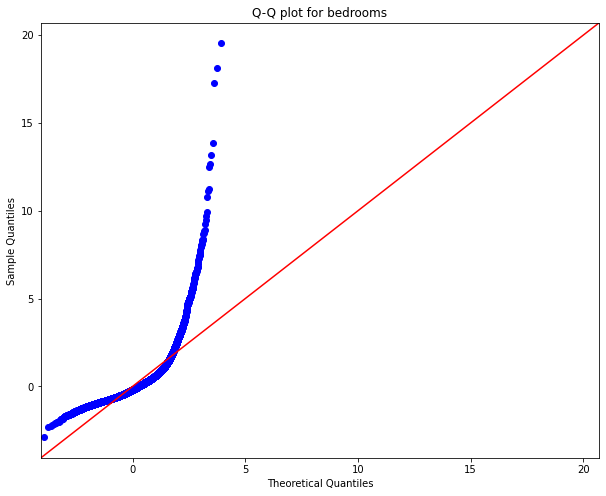

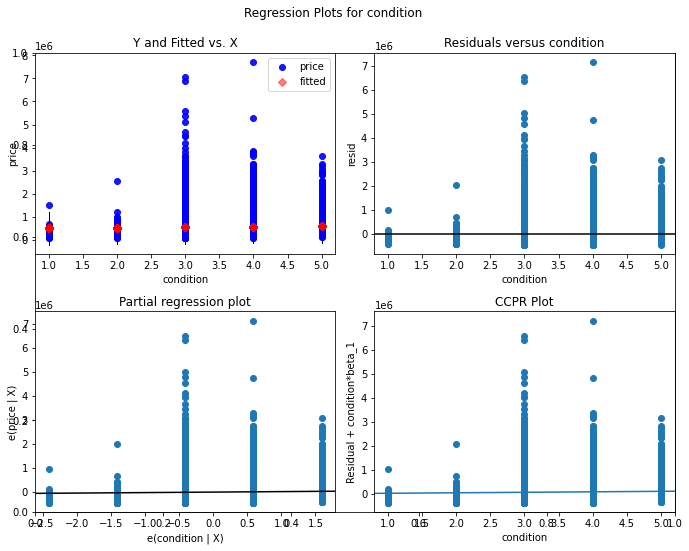

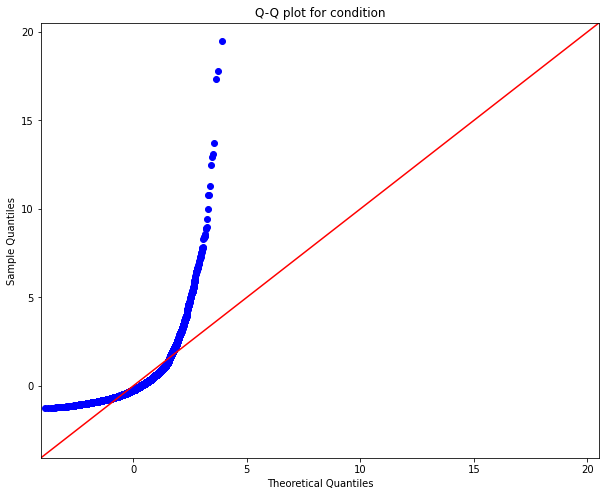

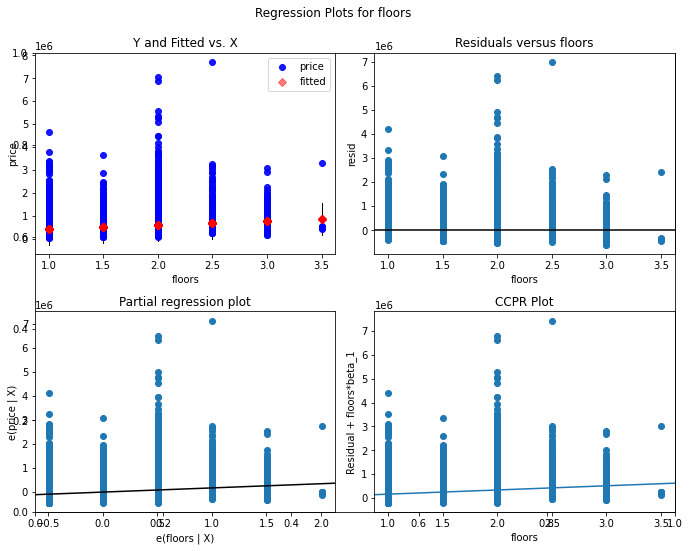

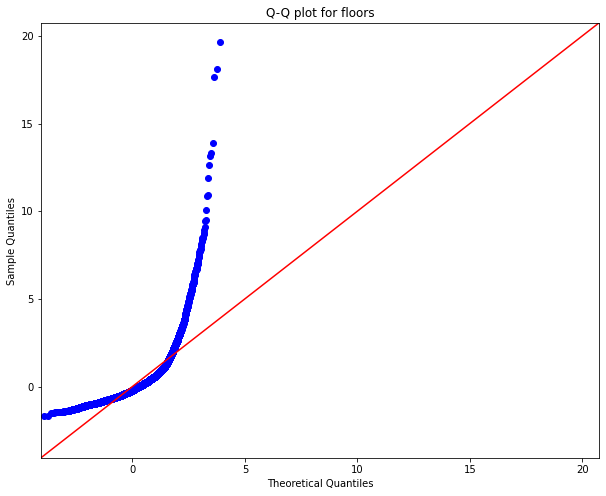

In [731]:
#initialize empty list in the variable name results
results = []

columns = ["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]

# Loop through each column and fit an OLS model
for col in columns:
    formula = f'price ~ {col}'
    model = smf.ols(formula=formula, data=housing_data_selected).fit()
    results.append(model)

# Plotting regression diagnostics for each model
for i, model in enumerate(results):
    col = columns[i]
    
    # Create a figure and axes for regression plots
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot regression diagnostics for the specific column
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()
    
    # Create a figure and axes for Q-Q plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Q-Q plot to check the normality of the residuals
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
    plt.title(f'Q-Q plot for {col}')
    plt.show()

#### Data Preparation

In [732]:
x = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]
y = housing_data_selected['price']

In [733]:
#train_test_split using 0.8 as the train and 0.2 as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

#### Modeling

In [735]:
#Here we are training our model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [744]:
x_test.isnull().sum()

sqft_living    0
bathrooms      0
bedrooms       1
condition      0
floors         0
dtype: int64

#### Model Validation